# Introduction to Pit30M

Welcome to Pit30M! To get started, go through these tutorial notebooks in order.


Note that you don't need to download anything---the `pit30m` development kit is cloud-native, which means you can use it to directly access the dataset. There are good reasons for this--the total dataset size is well over 100TB!


### Technical Notes
But don't worry, the dataset has been designed to be cloud-friendly. For example, we provide a PyTorch dataloader which can be used to train and evaluate various models (deep or non-deep). Even modest AWS instances can read hundreds of images a second using the devkit, obviating the need for local copies.

In terms of **programming languages**, while the devkit and related tooling is all Python, as Python has become the *lingua franca* of computer vision and machine learning in the recent years, the devkit is structured in plain formats like individual images files, CSV files, etc., so it can be read from any language which can talk to S3 (so, most languages).

If you do want to copy the dataset, you can always use the [AWS CLI](https://docs.aws.amazon.com/cli/latest/userguide/getting-started-quickstart.html) to `aws s3 sync ...` all or parts of the dataset to wherever you like, such as an on-prem cluster. However, using S3 is recommended due to its speed, space efficiency, and convenience.


### AWS Open Data
AWS provides credit initiatives to researchers interested in working with open datasets (TBD links - ask AWS contacts!)


### Credits
The set of tutorials is inspired by the great documentation of [the Boreas dataset](https://www.boreas.utias.utoronto.ca/).

In [1]:
# TODO(andrei): Remove this cell once we set up a proper Python package.
# The cell assumes we ran the jupyter notebook from the devkit repo root.
import os
import sys
pth = os.path.realpath("../")
sys.path.append(pth)

In [2]:
import matplotlib.pyplot as plt
import numpy as np 

%matplotlib inline

from pit30m.data.log_reader import LogReader
from pit30m.camera import CamNames

## Reading Images

We will now show how to do basic I/O using the low-level interface of Pit30M: the log reader. In later tutorials we will check out some more interesting abstractions, like leveraging a PyTorch dataloader to read data in parallel at scale for evaluating computer vision algorithms, doing 3D reconstruction, or training neural networks.

In [3]:
# TODO(andrei): Put the AWS URI here once allocated.
log_root_uri = "/mnt/data/pit30m/out/sample_out_v6/0209f084-2efb-4acf-f2ce-e8f8a58c8b06"
lr = LogReader(log_root_uri)

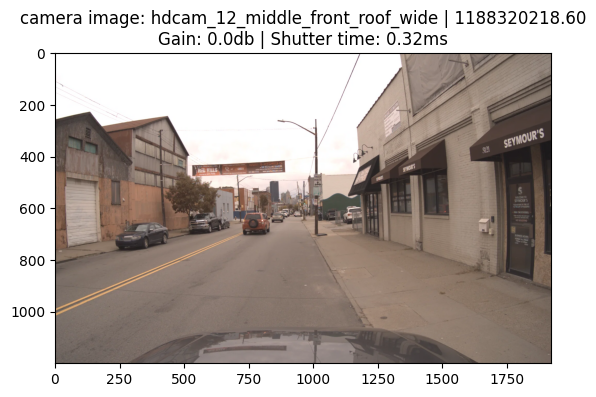

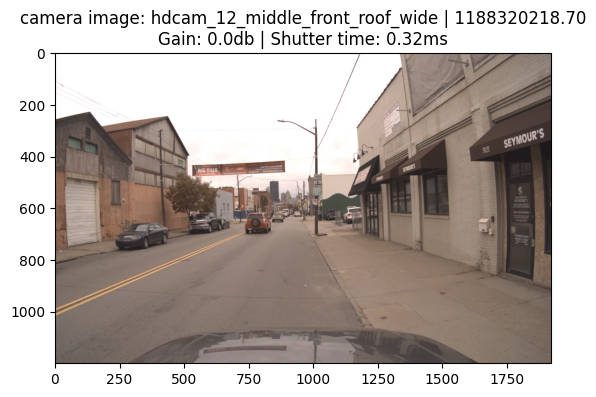

In [15]:
cam_it = lr.camera_iterator(CamNames.MIDDLE_FRONT_WIDE)
for idx, cam_img in enumerate(cam_it):
    if idx >= 2:
        break
    
    plt.figure()
    plt.imshow(cam_img.img)
    plt.title(f"camera image: {cam_img.cam_name.value} | {cam_img.capture_timestamp:.2f}\n" \
              f"Gain: {cam_img.gain_db}db | Shutter time: {cam_img.shutter_time_s * 1000:.2f}ms")

# Reading (Lots of) Poses

In [16]:
# TODO(andrei): Read and plot here with folium

## Reading LiDAR

TODO(andrei)